# Chapter 9: Classification and Regression Trees

# Part 1: Answer the following questions. Keep your answers short.

Q1. Can a data analyst use CART for classification or regression?

A1. Yes, Data Analyst can utilize CART for both classification and regression tasks. In Classification, CART can be utilized to predict the class or category to which a particular data belongs. While in terms of Regression, CART can be used to predict a numerical value.



Q2. What are the trees based on?

A2. Trees are based on decision rules, which is decided by splitting the data at each node.

Q3. What are the two key ideas underlying trees?

A3. Recursive Partitioning and Stopping Tree Growth.
**Recursive Partitioning**: Repeatedly split the records into two parts to
achieve maximum homogeneity of outcome within each new part. **Stopping Tree Growth**: A fully grown tree is too complex and it is highly likely that it will overfit.

Q4. Who developed the tree methodology and when?

A4. It was developed by Leo Breiman, Jerome Friedman, Richard Olshen, and Charles Stone in 1984.

Q5. What are the two types of nodes in a tree?

A5. Internal Nodes and Leaf Nodes (Terminal Nodes).

Q6. How are new records classified using a tree?

A6. New records starts at the begining of the tree, also known as root of the tree, which is known for containing decision rule.

Q7. Summarize the "Riding Mowers" example underlining the aim of classification.

A7. Riding Mowers example aims to classify customers into two distinct categories, those who are likely to purchase a riding mower and those who are unlikely to purchase a riding mower.

Q8. Name two measures of impurity and explain how we use these measures in decision tress.

A8.

*   Gini Impurity: It is useful for measuring the probability of classifying a randomly choosen element from the data. A lower gini impurity indicates a purer node.
*   Entropy: It measures the level of uncertainity or disorder within a node.



Q9. Explain how tree method can be used for a numerical outcome briefly.

A9. Tree based methods can be useful for numerical outcomes through regression. Tree model predicts the continous value.

Q10. What are the advantages and weaknesses of a tree?

A10. Key advantage of of a tree is that, it can work without dealing extensively with missing data. Another advantage is variable selection and reduction is automatic. Instability is one of the key disadvantage of single tree besides, trees are also known for poor predictive performance.

In [2]:
# RO92
# install dmba
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 19.2 MB/s eta 0:00:00


In [3]:
# RO92
# install relevant libraries
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline

Colab environment detected.


## Figure 9.7

IMPORTANT: I have added the code block below to run the following code block, this was required for my laptop used as
a local host. If you cannot run the following code block (starting with "mower_df = dmba.load_data....") then you have to add similar lines. Or you may prefer to run all over Google Colab which I suggest. If you prefer to do so you can remove the code block below (starting with "import os").

In [4]:
# RO92
import os
graph_path = 'C:/Users/mo0354/windows_10_msbuild_Release_graphviz-9.0.0-win32/Graphviz/bin'
os.environ["PATH"] += os.pathsep + graph_path

Classes: Nonowner, Owner


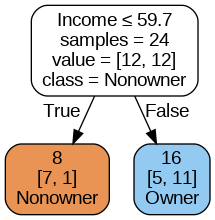

In [6]:
# RO92
# Load dataset, fit a decision tree model on ownership prediction
mower_dfRO92 = dmba.load_data('RidingMowers.csv')

classTreeRO92 = DecisionTreeClassifier(random_state=0, max_depth=1)
classTreeRO92.fit(mower_dfRO92.drop(columns=['Ownership']), mower_dfRO92['Ownership'])

print("Classes: {}".format(', '.join(classTreeRO92.classes_)))
plotDecisionTree(classTreeRO92, feature_names=mower_dfRO92.columns[:2], class_names=classTreeRO92.classes_)

The order of the `values` vector in the boxes is the same as `classTree.classes_`.

## Figure 9.8
Grow tree fully

Classes: Nonowner, Owner


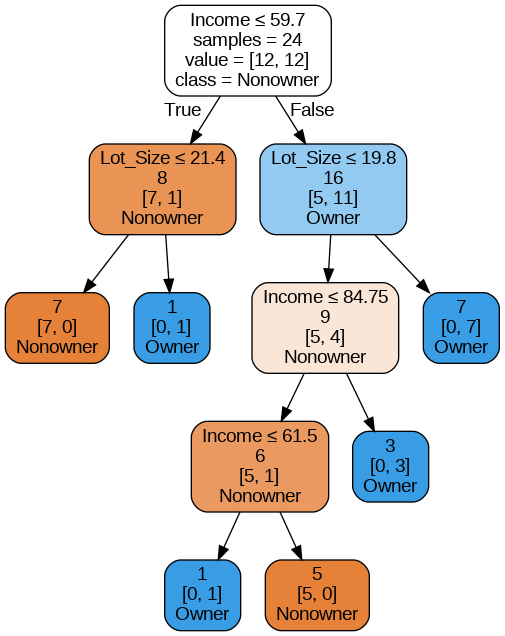

In [7]:
# RO92
# full-depth decision tree model on ownership prediction and plot the decision tree.
classTreeRO92 = DecisionTreeClassifier(random_state=0)
classTreeRO92.fit(mower_dfRO92.drop(columns=['Ownership']), mower_dfRO92['Ownership'])

print("Classes: {}".format(', '.join(classTreeRO92.classes_)))
plotDecisionTree(classTreeRO92, feature_names=mower_dfRO92.columns[:2], class_names=classTreeRO92.classes_)

## Figure 9.10

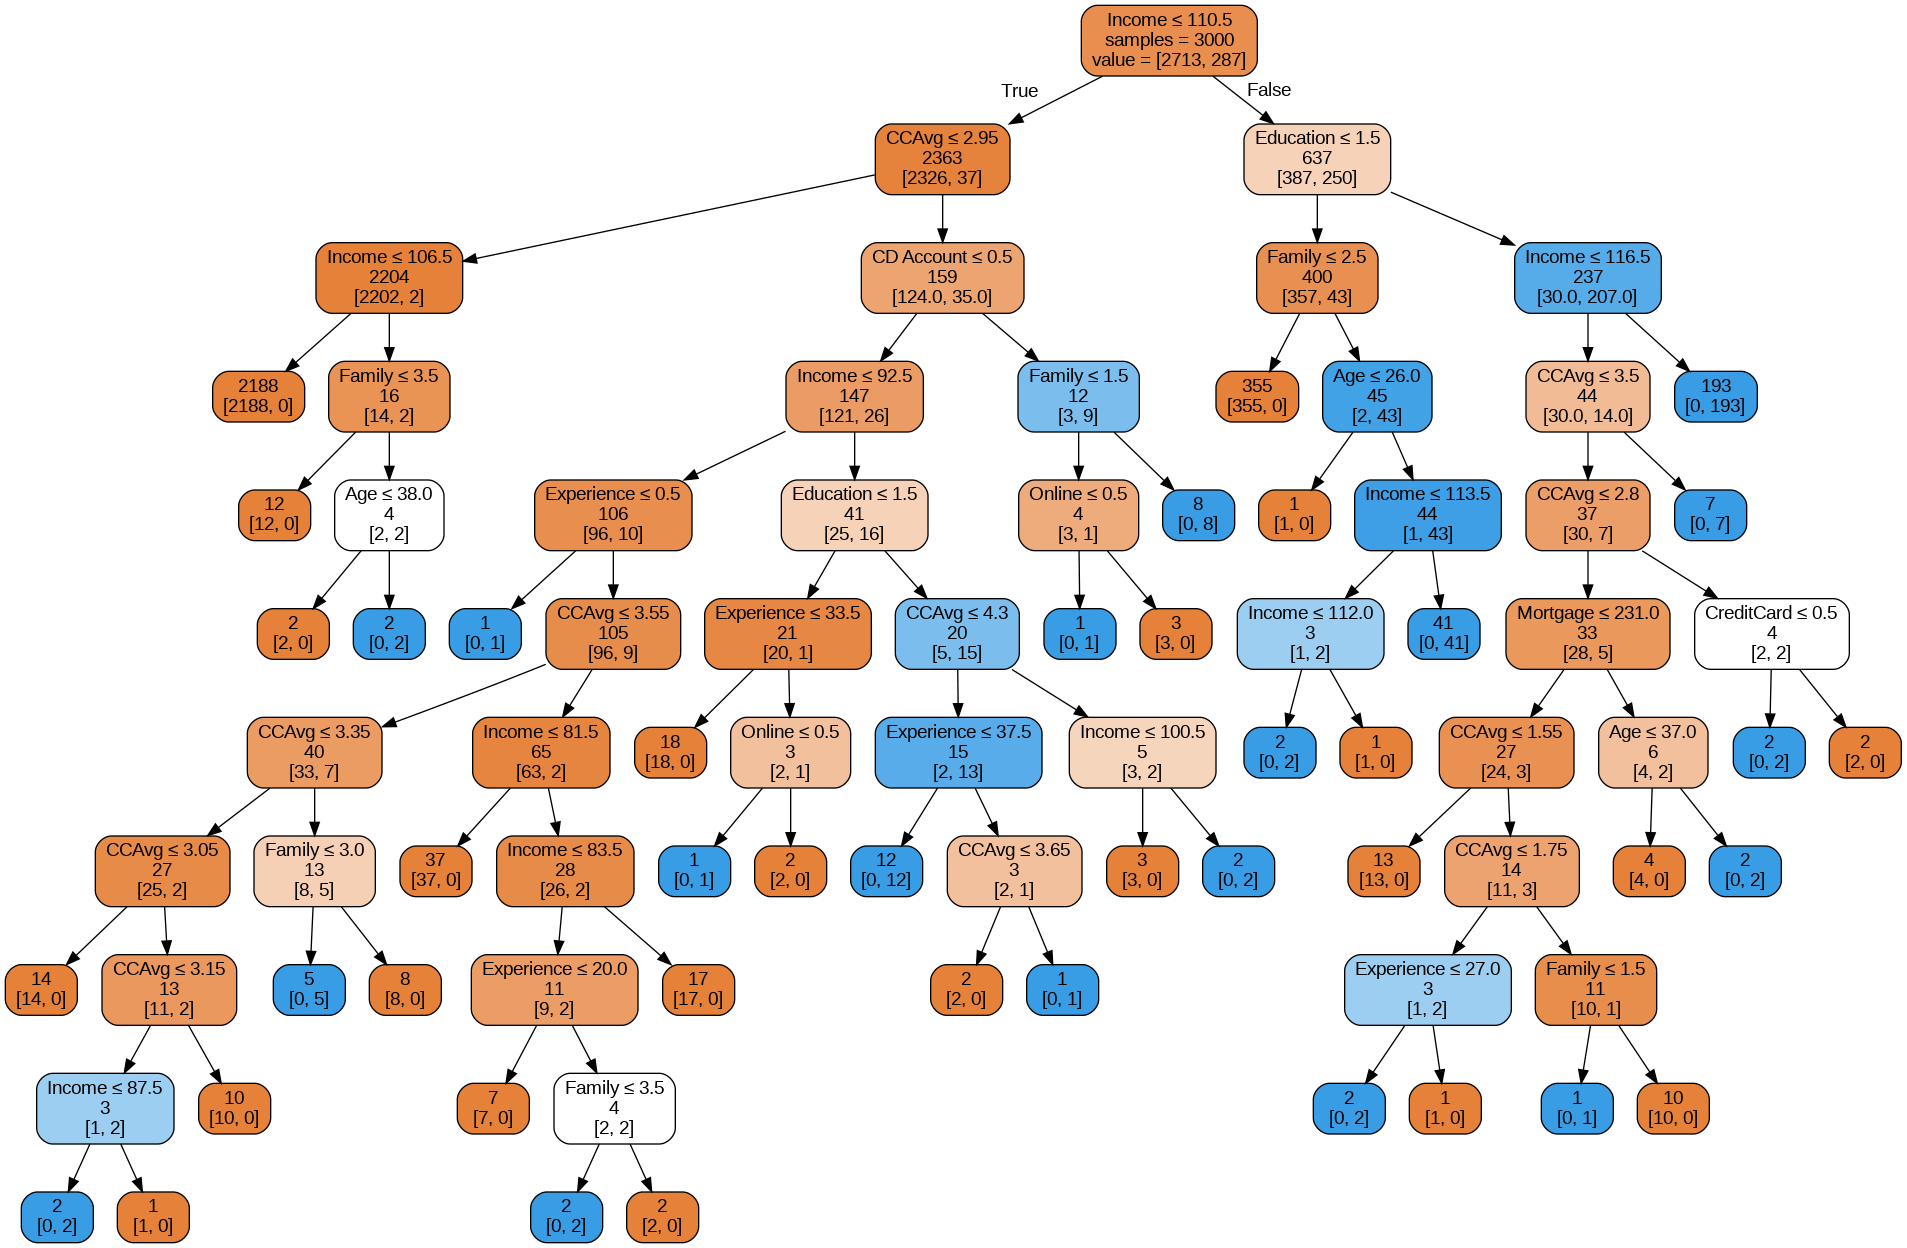

In [9]:
# RO92
# loads the UniversalBank dataset, splits it into training and validation sets, trains a decision tree classifier.
bank_dfRO92 = dmba.load_data('UniversalBank.csv')
bank_dfRO92 = bank_dfRO92.drop(columns=['ID', 'ZIP Code'])

X = bank_dfRO92.drop(columns=['Personal Loan'])
y = bank_dfRO92['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTreeRO92 = DecisionTreeClassifier()
fullClassTreeRO92.fit(train_X, train_y)

plotDecisionTree(fullClassTreeRO92, feature_names=train_X.columns)

## Table 9.3
<!-- <div class='alert alert-danger'>R output for reference - remove once missing metrics are available.
```
> confusionMatrix(default.ct.point.pred.train, train.df$Personal.Loan)
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2696   26
         1   13  265
                                          
               Accuracy : 0.987           
                 95% CI : (0.9823, 0.9907)
    No Information Rate : 0.903           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9243          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.9952          
            Specificity : 0.9107          
         Pos Pred Value : 0.9904          
         Neg Pred Value : 0.9532          
             Prevalence : 0.9030          
         Detection Rate : 0.8987          
   Detection Prevalence : 0.9073          
      Balanced Accuracy : 0.9529          
                                          
       'Positive' Class : 0               
```
</div>-->

In [10]:
# RO92
# classification summaries to evaluate the performance of the decision tree on both the training and validation datasets.

classificationSummary(train_y, fullClassTreeRO92.predict(train_X))
classificationSummary(valid_y, fullClassTreeRO92.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287
Confusion Matrix (Accuracy 0.9795)

       Prediction
Actual    0    1
     0 1791   16
     1   25  168


## Table 9.4

In [11]:
# RO92
# Five-fold cross-validation of the full decision tree classifier
treeClassifierRO92 = DecisionTreeClassifier()

scoresRO92 = cross_val_score(treeClassifierRO92, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scoresRO92])
print(f'Accuracy: {scoresRO92.mean():.3f} (+/- {scoresRO92.std() * 2:.3f})')
print(f'Accuracy: {scoresRO92.mean():.3f} (+/- {scoresRO92.std():.3f})')

Accuracy scores of each fold:  ['0.982', '0.972', '0.995', '0.985', '0.993']
Accuracy: 0.985 (+/- 0.017)
Accuracy: 0.985 (+/- 0.008)


## Figure 9.12

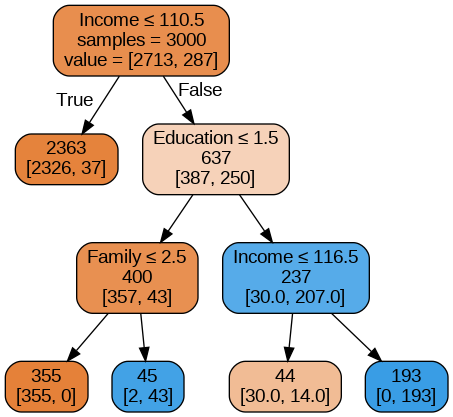

In [12]:
# RO92
# code trains a decision tree classifier with specified hyperparameters and plots the resulting decision tree.

smallClassTreeRO92 = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTreeRO92.fit(train_X, train_y)

plotDecisionTree(smallClassTreeRO92, feature_names=train_X.columns)

## Table 9.5

In [13]:
# RO92
# classification summaries to evaluate the performance of the pruned decision tree on both the training and validation datasets.

classificationSummary(train_y, smallClassTreeRO92.predict(train_X))
classificationSummary(valid_y, smallClassTreeRO92.predict(valid_X))

Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236
Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


## Grid search

## Table 9.6

In [15]:
# RO92
# performs a grid search for hyperparameter tuning of a decision tree classifier, improving the parameters based on the initial search results.

# Start with an initial guess for parameters
param_gridRO92 = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}
gridSearchRO92 = GridSearchCV(DecisionTreeClassifier(), param_gridRO92, cv=5, n_jobs=-1)
gridSearchRO92.fit(train_X, train_y)
print('Initial score: ', gridSearchRO92.best_score_)
print('Initial parameters: ', gridSearchRO92.best_params_)

# Adapt grid based on result from initial grid search
param_gridRO92 = {
    'max_depth': list(range(2, 16)),
    'min_samples_split': list(range(10, 22)),
    'min_impurity_decrease': [0.0009, 0.001, 0.0011],
}
gridSearchRO92 = GridSearchCV(DecisionTreeClassifier(), param_gridRO92, cv=5, n_jobs=-1)
gridSearchRO92.fit(train_X, train_y)
print('Improved score: ', gridSearchRO92.best_score_)
print('Improved parameters: ', gridSearchRO92.best_params_)

bestClassTreeRO92 = gridSearchRO92.best_estimator_

Initial score:  0.9876666666666667
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved score:  0.9873333333333333
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


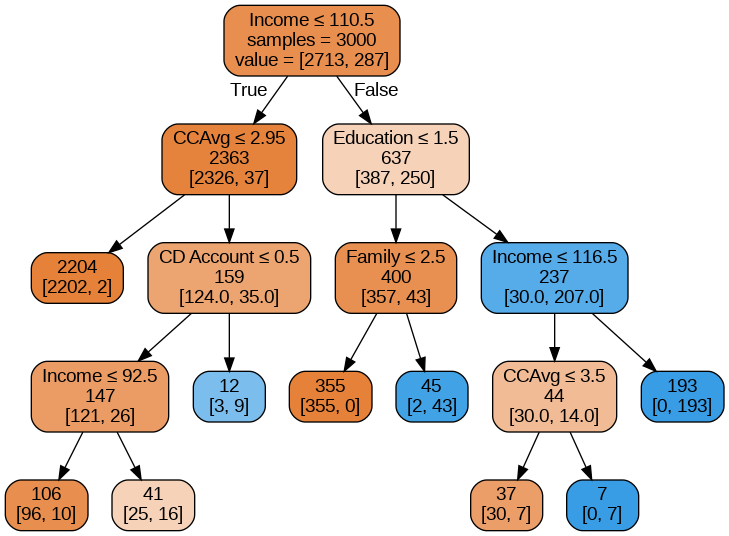

In [16]:
# RO92
# plot best class decision tree
plotDecisionTree(bestClassTreeRO92, feature_names=train_X.columns)

In [17]:
# RO92
# classification summaries to evaluate the performance of the tuned decision tree on both the training and validation datasets.
classificationSummary(train_y, bestClassTreeRO92.predict(train_X))
classificationSummary(valid_y, bestClassTreeRO92.predict(valid_X))

Confusion Matrix (Accuracy 0.9867)

       Prediction
Actual    0    1
     0 2708    5
     1   35  252
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1801    6
     1   31  162


## Figure 9.16

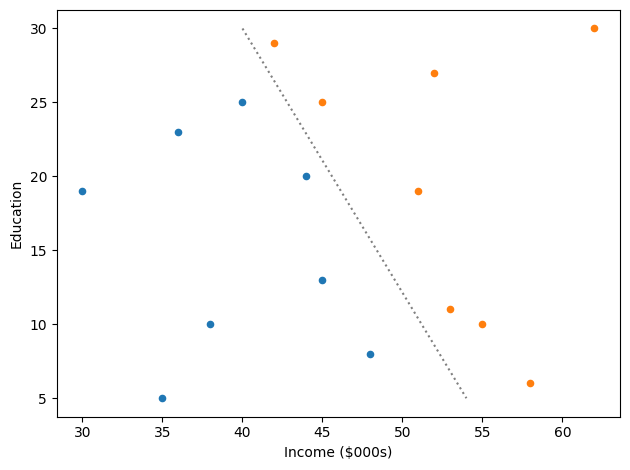

In [18]:
# RO92
# scatter plot of two categories, highlighting income vs. education, and adds a reference line between two points.

fakeScatterRO92 = pd.DataFrame([
    (30, 19, 1), (35, 5, 1), (40, 25, 1), (45, 13, 1),
    (38, 10, 1), (36, 23, 1), (48, 8, 1), (44, 20, 1), (50, 12),
    (51, 19, 0), (62, 30, 0), (42, 29, 0), (45, 25, 0),
    (55, 10, 0), (52, 27, 0), (58, 6, 0), (53, 11, 0),
], columns=['x', 'y', 'category'])
ax = fakeScatterRO92.loc[fakeScatterRO92.category==1,:].plot.scatter(x='x', y='y', color='C0')
fakeScatterRO92.loc[fakeScatterRO92.category==0,:].plot.scatter(x='x', y='y', ax=ax, color='C1')
plt.plot((40, 54), (30, 5), ':', color='grey')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Education')

plt.tight_layout()
plt.show()

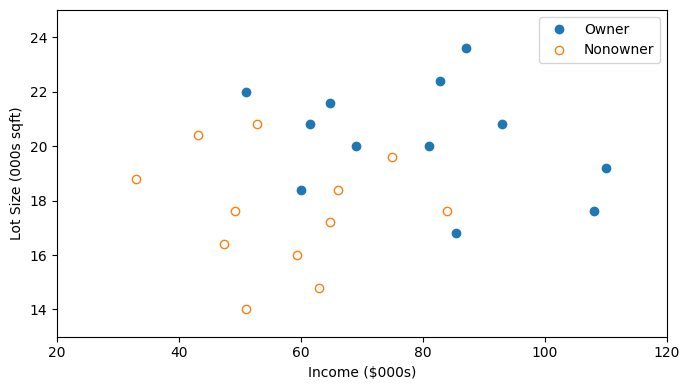

In [19]:
# RO92
# function to plot income vs. lot size for two ownership categories, then displays the plot with customized axis labels and limits.

def basePlot(ax):
    mower_dfRO92.loc[mower_dfRO92.Ownership=='Owner'].plot(x='Income', y='Lot_Size', style='o',
                                                   markerfacecolor='C0', markeredgecolor='C0',
                                                   ax=ax)
    mower_dfRO92.loc[mower_dfRO92.Ownership=='Nonowner'].plot(x='Income', y='Lot_Size', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1',
                                                      ax=ax)
    ax.legend(["Owner", "Nonowner"]);
    ax.set_xlim(20, 120)
    ax.set_ylim(13, 25)
    ax.set_xlabel('Income ($000s)')
    ax.set_ylabel('Lot Size (000s sqft)')
    return ax

fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

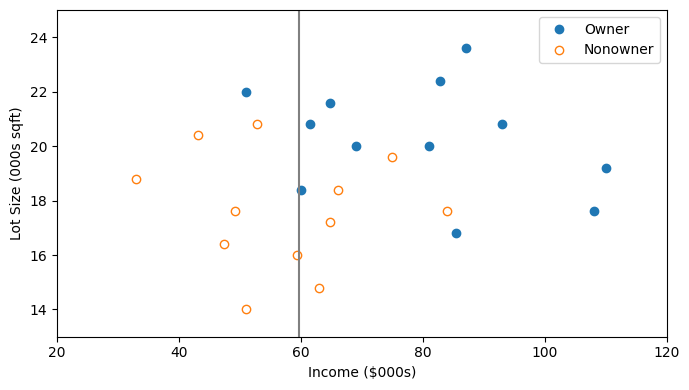

In [20]:
# RO92
# plot the figure
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
ax.plot((x0, x0), (25, 13), color='grey')
plt.tight_layout()
plt.show()

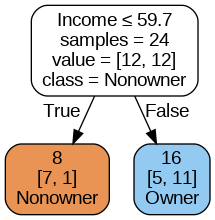

In [21]:
# RO92
# trains a decision tree classifier with a maximum depth of 1 to predict ownership based on income and lot size, then plots the decision tree.

classTreeRO92 = DecisionTreeClassifier(random_state=0, max_depth=1)
classTreeRO92.fit(mower_dfRO92.drop(columns=['Ownership']), mower_dfRO92['Ownership'])
plotDecisionTree(classTreeRO92, feature_names=mower_dfRO92.columns[:2], class_names=classTreeRO92.classes_)

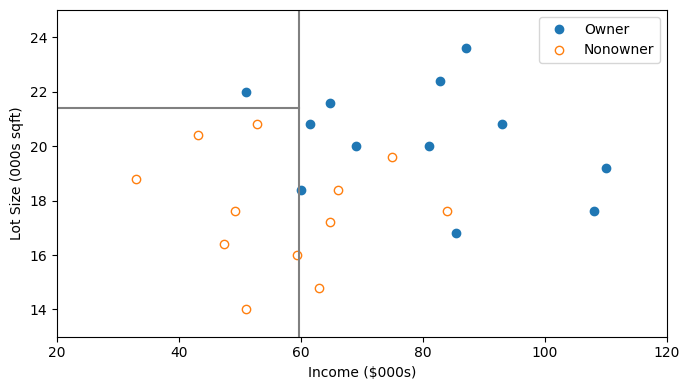

In [22]:
# RO92
# plot the figure
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
plt.tight_layout()
plt.show()

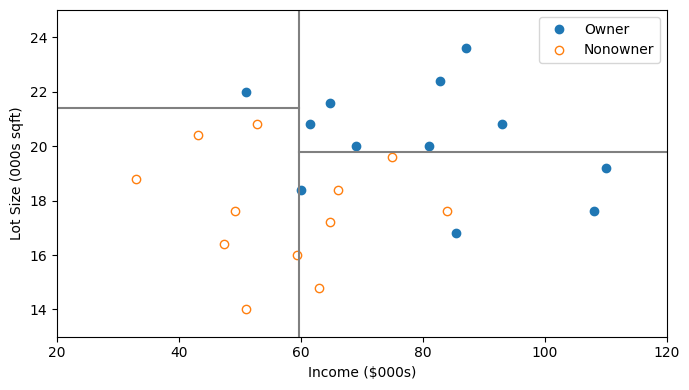

In [23]:
# RO92
# display the figure
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
plt.tight_layout()
plt.show()

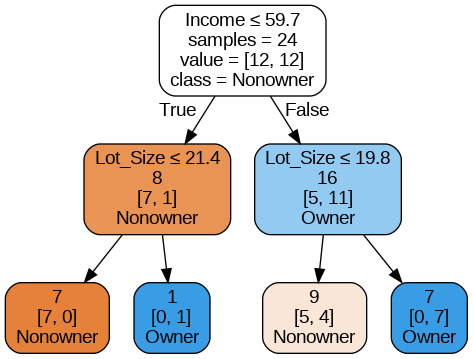

In [24]:
# RO92
# decision tree classifier with a maximum depth of 2 to predict ownership based on income and lot size.

classTreeRO92 = DecisionTreeClassifier(random_state=0, max_depth=2)
classTreeRO92.fit(mower_dfRO92.drop(columns=['Ownership']), mower_dfRO92['Ownership'])
plotDecisionTree(classTreeRO92, feature_names=mower_dfRO92.columns[:2], class_names=classTreeRO92.classes_)

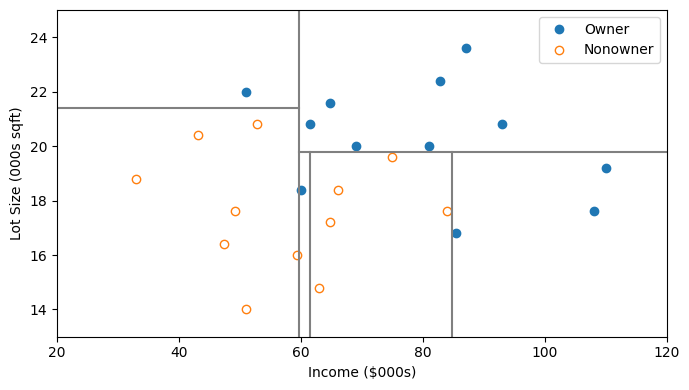

In [25]:
# RO92
# plot the figure
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
x3 = 84.75
x4 = 61.5
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
ax.plot((x3, x3), (13, y2), color='grey')
ax.plot((x4, x4), (13, y2), color='grey')
plt.tight_layout()
plt.show()

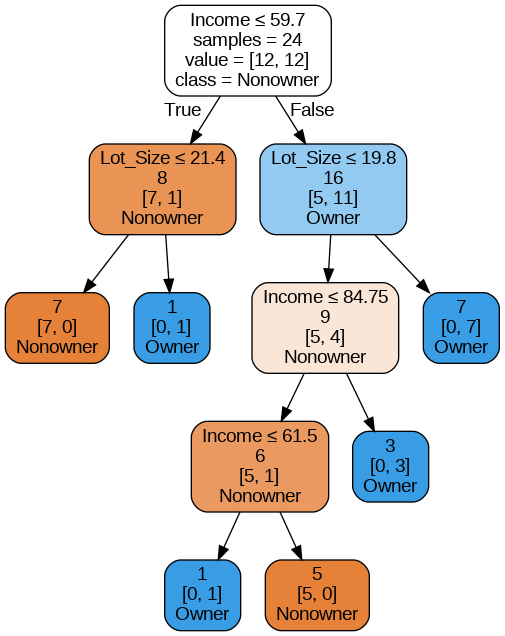

In [26]:
# RO92
# trains a decision tree classifier without depth limitation to predict ownership based on income and lot size, then plots the decision tree.

classTreeRO92 = DecisionTreeClassifier(random_state=0)
classTreeRO92.fit(mower_dfRO92.drop(columns=['Ownership']), mower_dfRO92['Ownership'])
plotDecisionTree(classTreeRO92, feature_names=mower_dfRO92.columns[:2], class_names=classTreeRO92.classes_)

## Information about full decision tree

In [27]:
# RO92
# prints the number of nodes in the decision tree model.
treeRO92 = fullClassTreeRO92
print('Number of nodes', treeRO92.tree_.node_count)

Number of nodes 85


In [28]:
# RO92
# traverses the decision tree to compute node depths, identify leaf nodes, and count the number of terminal leaves.

estimatorRO92 = treeRO92
# Using those arrays, we can parse the tree structure:

n_nodes = estimatorRO92.tree_.node_count
children_left = estimatorRO92.tree_.children_left
children_right = estimatorRO92.tree_.children_right
feature = estimatorRO92.tree_.feature
threshold = estimatorRO92.tree_.threshold
value = estimatorRO92.tree_.value


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

from collections import Counter
nodeClassCounter = Counter()
terminal_leaves = 0
for i in range(n_nodes):
    if is_leaves[i]:
        terminal_leaves = terminal_leaves + 1
        nodeClassCounter.update([np.argmax(value[i][0])])
print()
print('Number of terminal leaves', terminal_leaves)
print(nodeClassCounter)


Number of terminal leaves 43
Counter({0: 24, 1: 19})


## Regression Trees : Table 9.7 and Figure 9.14

In [30]:
# RO92
# # This code performs a grid search for hyperparameter tuning of a decision tree regressor on a Toyota Corolla dataset to predict car prices.

toyotaCorolla_dfRO92 = dmba.load_data('ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_dfRO92 = toyotaCorolla_dfRO92.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC',
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_dfRO92[predictors], drop_first=True)
y = toyotaCorolla_dfRO92[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_gridRO92 = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearchRO92 = GridSearchCV(DecisionTreeRegressor(), param_gridRO92, cv=5, n_jobs=-1)
gridSearchRO92.fit(train_X, train_y)
print('Initial parameters: ', gridSearchRO92.best_params_)

param_gridRO92 = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
    'min_samples_split': [14, 15, 16, 18, 20, ],
}
gridSearchRO92 = GridSearchCV(DecisionTreeRegressor(), param_gridRO92, cv=5, n_jobs=-1)
gridSearchRO92.fit(train_X, train_y)
print('Improved parameters: ', gridSearchRO92.best_params_)

regTreeRO92 = gridSearchRO92.best_estimator_

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 16}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [31]:
# RO92
# regression summaries to evaluate the performance of the tuned decision tree regressor on both the training and validation datasets.

regressionSummary(train_y, regTreeRO92.predict(train_X))
regressionSummary(valid_y, regTreeRO92.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1058.8202
            Mean Absolute Error (MAE) : 767.7203
          Mean Percentage Error (MPE) : -0.8074
Mean Absolute Percentage Error (MAPE) : 6.8325

Regression statistics

                      Mean Error (ME) : 60.5241
       Root Mean Squared Error (RMSE) : 1554.9146
            Mean Absolute Error (MAE) : 1026.3487
          Mean Percentage Error (MPE) : -1.3082
Mean Absolute Percentage Error (MAPE) : 9.2311


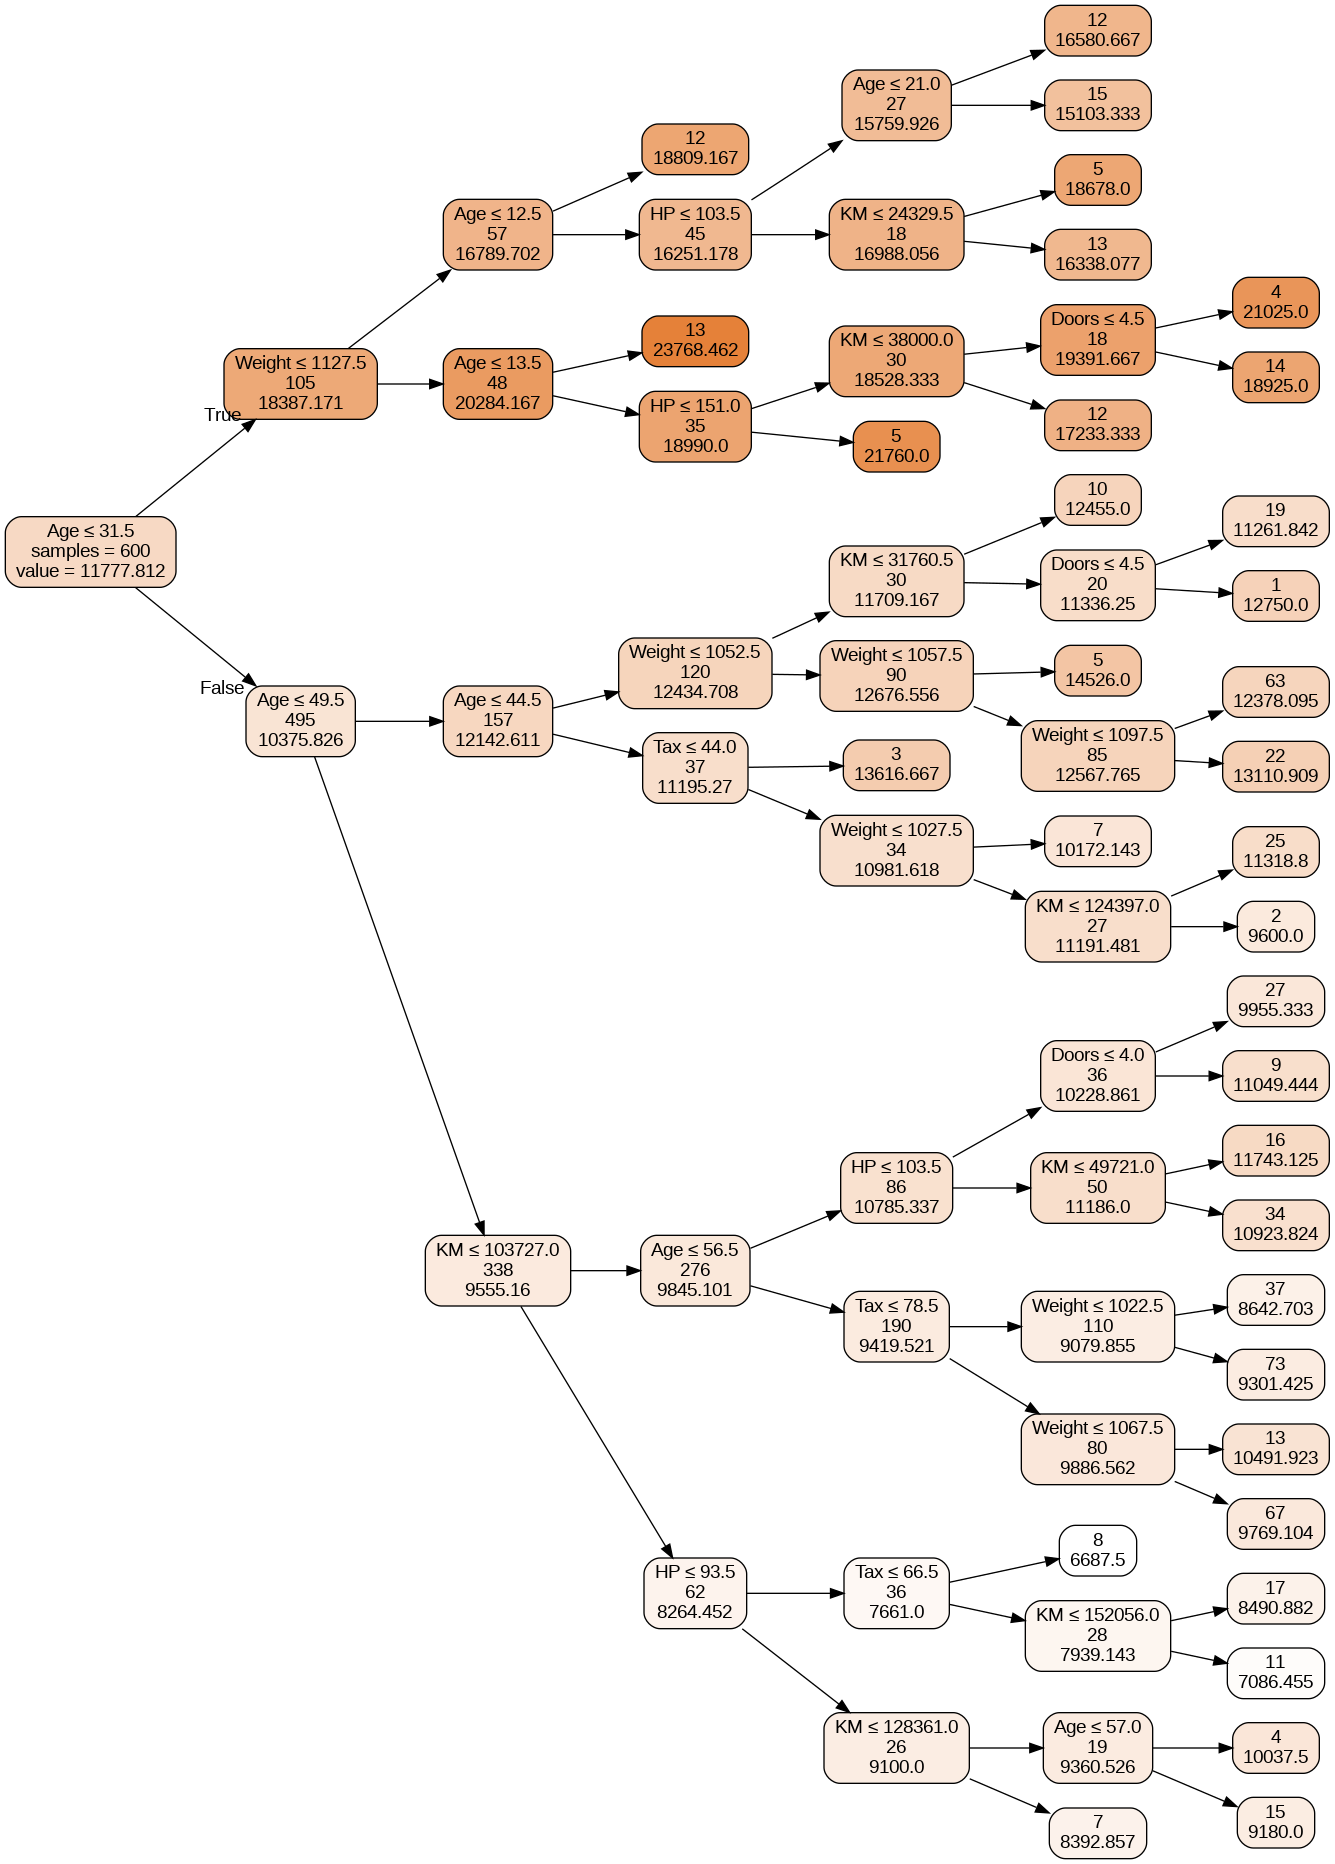

In [32]:
# RO92
# plots the decision tree regressor both normally and with a rotated view for better visualization.

plotDecisionTree(regTreeRO92, feature_names=train_X.columns)
plotDecisionTree(regTreeRO92, feature_names=train_X.columns, rotate=True)

## Figure 9.15 (no longer used)

In [33]:
# RO92
# loads the UniversalBank dataset, splits it into training and validation sets, and trains a random forest classifier with 500 trees.

bank_dfRO92 = dmba.load_data('UniversalBank.csv')
bank_dfRO92 = bank_dfRO92.drop(columns=['ID', 'ZIP Code'])

X = bank_dfRO92.drop(columns=['Personal Loan'])
y = bank_dfRO92['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

rfRO92 = RandomForestClassifier(n_estimators=500, random_state=1)
rfRO92.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

Variable importance plot

               feature  importance       std
7   Securities Account    0.003964  0.004998
9               Online    0.006394  0.005350
10          CreditCard    0.007678  0.007053
6             Mortgage    0.034243  0.023469
1           Experience    0.035539  0.016061
0                  Age    0.036258  0.015858
8           CD Account    0.057917  0.043185
3               Family    0.111375  0.053146
4                CCAvg    0.172105  0.103011
5            Education    0.200772  0.101002
2               Income    0.333756  0.129227


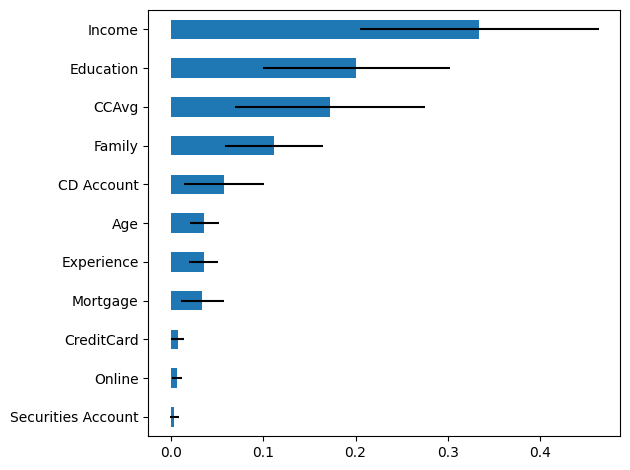

In [34]:
# RO92
# calculates and visualizes the feature importances and their standard deviations from a random forest classifier.

importancesRO92 = rfRO92.feature_importances_
stdRO92 = np.std([tree.feature_importances_ for tree in rfRO92.estimators_], axis=0)

dfRO92 = pd.DataFrame({'feature': train_X.columns, 'importance': importancesRO92, 'std': stdRO92})
dfRO92 = dfRO92.sort_values('importance')
print(dfRO92)

ax = dfRO92.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Confusion matrix and metrics

In [36]:
# RO92
# Confusion matrix summary
classificationSummary(valid_y, rfRO92.predict(valid_X))

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


## Table 9.5

In [37]:
# RO92
# trains a gradient boosting classifier and evaluates its performance on the validation dataset using a classification summary.

boostRO92 = GradientBoostingClassifier()
boostRO92.fit(train_X, train_y)
classificationSummary(valid_y, boostRO92.predict(valid_X))

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1799    8
     1   25  168


<span style="color:red">
Solve Problem 9.2 on page 248 of your textbook.
</span>